In [13]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))

data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)


data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear,BMI
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000,6114.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1589.387894,inf
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,751.603232,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000,13.992614
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1876.000000,26.448563
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1939.000000,28.312463
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,1975.000000,30.562004
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000,inf


In [14]:
data = data.query('Weight > 0')
data = data.query('Height > 0')
data = data.dropna(subset=['Position'])

new_data = pd.DataFrame()

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    for position in str(row['Position']).split(','):
        copy_series = series.copy()
        copy_series['Position'] = str.strip(position)
        new_data = new_data.append(copy_series, ignore_index = True)

new_data = new_data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight','BMI']]
new_data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI
count,6742.000000,6742.000000,6742.000000,6742.000000,6729.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,4.517651,17.353753,13.434589,3.919163,22.672462,2.548354,1.880451,2.050578,0.148176,52.563656,184.059205,97.358469,28.657132
std,3.637795,21.291470,18.395774,5.851433,72.737227,5.148352,11.180026,13.412071,1.069945,29.061291,7.921979,14.251213,3.270116
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.940000,53.523900,13.992614
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,177.800000,86.636143,26.310860
50%,3.000000,9.000000,6.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,50.000000,182.880000,97.522360,28.196742
75%,7.000000,24.000000,18.000000,5.000000,16.000000,3.000000,0.000000,0.000000,0.000000,70.562500,187.960000,107.954984,30.409584
max,18.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,151.499852,44.351543


In [15]:
grouped = new_data.groupby('Position')
grouped.describe()

%                                                         \
              count       mean        std    min      25%     50%      75%   
Position                                                                     
Back-row      438.0  53.050183  27.516324   0.00  35.7100  50.695  66.6600   
Centre        897.0  52.190468  29.502502   0.00  33.3300  50.000  71.4200   
Five-eighth     8.0  83.778750  14.009022  60.00  75.0000  84.285  93.7450   
Flanker       578.0  52.784291  30.779818   0.00  33.3300  50.835  73.4725   
Fly-half      467.0  53.501328  29.252549   0.00  35.2900  52.940  71.4200   
Forward         1.0  64.280000        NaN  64.28  64.2800  64.280  64.2800   
Front-row       1.0  42.850000        NaN  42.85  42.8500  42.850  42.8500   
Fullback      431.0  53.685406  27.729547   0.00  36.9300  50.000  69.3350   
Halfback       11.0  31.736364  27.441974   0.00   7.1400  30.000  54.1650   
Hooker        480.0  54.673187  27.918346   0.00  38.3825  51.830  71.1875   
Lock          826.0  50.758511  28.993126   0.00  33.3300  50.000  68.7500   
No. 8         261.0  52.215517  27.919480   0.00  37.5000  52.940  68.1800   
Outside back    7.0  51.085714  31.553150   0.00  37.5000  60.000  61.3000   
Prop          986.0  52.120497  28.830359   0.00  33.3300  50.000  70.0000   
Scrum-half    464.0  53.039806  30.094628   0.00  33.3300  53.740  74.0100   
Utility back   50.0  54.815400  30.825988   0.00  33.5500  55.840  71.3525   
Wing          836.0  52.244581  29.320492   0.00  33.3300  50.000  71.4200   

                        BMI                ...     Tries       Weight  \
                 max  count       mean     ...       75%   max  count   
Position                                   ...                          
Back-row      100.00  438.0  29.157753     ...      3.00  25.0  438.0   
Centre        100.00  897.0  27.570152     ...      5.00  47.0  897.0   
Five-eighth   100.00    8.0  27.118953     ...      5.25   9.0    8.0   
Flanker       100.00  578.0  28.072863     ...      2.00  27.0  578.0   
Fly-half      100.00  467.0  26.364397     ...      3.00  31.0  467.0   
Forward        64.28    1.0  26.022925     ...      0.00   0.0    1.0   
Front-row      42.85    1.0  32.783333     ...      1.00   1.0    1.0   
Fullback      100.00  431.0  26.168992     ...      5.00  46.0  431.0   
Halfback       75.00   11.0  25.825551     ...      0.50   2.0   11.0   
Hooker        100.00  480.0  31.255956     ...      2.00  17.0  480.0   
Lock          100.00  826.0  28.654301     ...      2.00  26.0  826.0   
No. 8         100.00  261.0  29.006371     ...      3.00  32.0  261.0   
Outside back  100.00    7.0  28.038054     ...      7.50  30.0    7.0   
Prop          100.00  986.0  33.378620     ...      1.00  14.0  986.0   
Scrum-half    100.00  464.0  26.432310     ...      3.00  38.0  464.0   
Utility back  100.00   50.0  26.923656     ...      9.00  41.0   50.0   
Wing          100.00  836.0  26.755460     ...      6.00  69.0  836.0   

                                                                         \
                    mean        std         min         25%         50%   
Position                                                                  
Back-row      104.999384   8.058894   75.749926  100.697506  105.687022   
Centre         91.358156   9.985853   63.502932   85.275366   92.532843   
Five-eighth    90.378280   9.158106   78.017888   85.388764   90.718474   
Flanker        98.402862   9.829622   68.038855   92.986436   99.790321   
Fly-half       84.338071   8.395836   59.874193   79.378665   85.728958   
Forward       104.779837        NaN  104.779837  104.779837  104.779837   
Front-row     100.697506        NaN  100.697506  100.697506  100.697506   
Fullback       86.577207   8.391437   63.049339   81.419830   86.636143   
Halfback       76.285989   7.988425   64.863709   71.894391   75.749926   
Hooker        101.360885  10.252262   69.399633   95.707990  102.511876   
Lock          108.998

In [16]:
temp = new_data
temp = temp.sort_values('BMI', ascending=False)
temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI
4774,Billy Cavubati,"July 21, 1970, Ba",11.0,Prop,27.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,48.14,180.34,144.242374,44.351543
595,Taniela Tupou,"May 10, 1996, Vaini, Tongatapu",2.0,Prop,10.0,2.0,8.0,5.0,1.0,0.0,0.0,0.0,30.00,177.80,134.716934,42.614626
6033,Jeremiah Fatialofa,"April 26, 1984",1.0,Prop,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,177.80,133.809749,42.327658
5885,Fosi Pala'amo,"August 23, 1976, Murupara",12.0,Prop,14.0,13.0,1.0,5.0,1.0,0.0,0.0,0.0,50.00,185.42,144.695966,42.086545
6409,Ben Tameifuna,"August 30, 1991, Auckland",2.0,Prop,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,50.00,182.88,139.706450,41.771881


In [9]:
temp = new_data
temp = temp.sort_values('BMI', ascending=True)
temp.head(10)

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI
6342,Taumei Hikila,"November 13, 1980",1.0,Lock,1.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,100.00,195.58,53.523900,13.992614
1314,Gilbert Pierrot,"February 3, 1889, Bizanos",1.0,Centre,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,203.20,70.306817,17.027466
5395,Pedro Fernandes,"December 12, 1973",8.0,Scrum-half,11.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,18.18,195.58,75.296333,19.684525
1666,Alain Porthault,"July 15, 1929, Vervins",3.0,Wing,7.0,7.0,0.0,9.0,3.0,0.0,0.0,0.0,71.42,180.34,65.317301,20.083717
4029,Pierre Edwards,"May 23, 1953, George",1.0,Fullback,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,198.12,81.646627,20.800875
1540,Paul Boyer,"May 19, 1908, Arthes",1.0,Scrum-half,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,175.26,63.956524,20.821846
5249,Pat Kotze,"December 20, 1977",1.0,Flanker,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,193.04,78.017888,20.936282
1252,Joseph de Muizon,"December 29, 1890, Versailles",1.0,Wing,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,180.34,69.399633,21.338950
5292,John Drotsky,"June 16, 1984, Rehoboth, South-West Africa",3.0,Wing,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,50.00,180.34,69.853225,21.478420
4149,Pieter Rossouw,"December 3, 1971, Swellendam",7.0,Wing,43.0,39.0,4.0,105.0,21.0,0.0,0.0,0.0,69.76,193.04,80.285849,21.544895


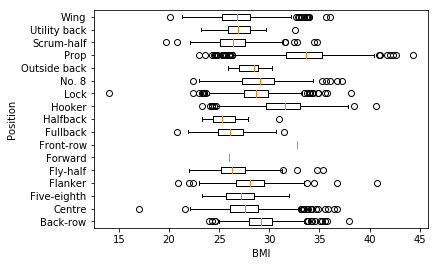

In [44]:
Y = []
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1]['BMI'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('BMI')
plt.ylabel('Position')
plt.show()